## Calculate slope of each road

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely import wkt
import glob
import math

import geopandas as gpd
from shapely.ops import nearest_points
from shapely.wkt import loads

In [19]:
london_gdf = gpd.read_file("./Data/Boundaries/London/ESRI/London_Ward.shp")
# london_gdf.plot()
# plt.show()

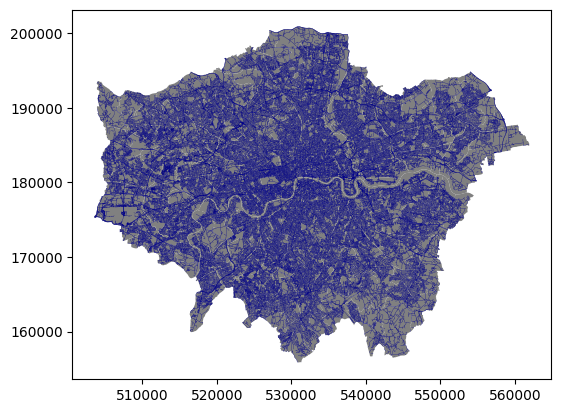

In [20]:
clipped_road = gpd.read_file("./Data/clipped_highways/clipped_road.shp")

fig, ax = plt.subplots()
london_gdf.plot(ax=ax, color='grey')
clipped_road.plot(ax=ax, color='darkblue',lw=0.2)
plt.show()

In [21]:
cycle_accident_2019 = pd.read_csv('merged_cycle_accident_2019.csv')
cycle_accident_2019['geometry'] = cycle_accident_2019['geometry'].apply(loads)

cycle_accident_2020 = pd.read_csv('merged_cycle_accident_2020.csv')
cycle_accident_2020['geometry'] = cycle_accident_2020['geometry'].apply(loads)

In [22]:
cycle_accident_2020

,accident_index,accident_y,speed_limit,vehicle_type,date,day_of_week,accident_severity,road_type,longitude,latitude,number_of_vehicles,time,geometry
0,2020010228120,2020,30,1,01/01/2020,4,2,6,-0.097893,51.360301,2,19:43:00.000,POINT (532528.8384909306 164075.9437305034)
1,2020010228170,2020,30,1,02/01/2020,5,3,3,-0.076192,51.542374,2,08:55:00.000,POINT (533507.8261167022 184362.1830384319)
2,2020010228181,2020,20,1,02/01/2020,5,2,6,-0.095292,51.487318,3,08:46:00.000,POINT (532342.7525310743 178205.1283247002)
3,2020010228239,2020,30,1,02/01/2020,5,3,6,0.130422,51.555557,2,15:37:00.000,POINT (547791.8608347359 186225.1661598993)
4,2020010228255,2020,30,1,02/01/2020,5,2,6,-0.098573,51.364009,2,15:46:00.000,POINT (532470.8071835677 164487.0476750393)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,2020481008266,2020,20,1,12/11/2020,5,2,6,-0.083816,51.513993,2,06:20:00.000,POINT (533061.821358647 181192.2511163475)
4995,2020481011584,2020,20,1,26/11/2020,5,3,3,-0.086584,51.510890,2,16:30:00.000,POINT (532878.7861793368 180842.1632205275)
4996,2020481013284,2020,20,1,08/12/2020,3,3,6,-0.103210,51.511008,2,21:30:00.000,POINT (531724.7742133258 180825.2531425263)
4997,2020481013284,2020,20,1,08/12/2020,3,3,6,-0.103210,51.511008,2,21:30:00.000,POINT (531724.7742133258 180825.2531425263)


In [23]:
cycle_accident_2019_gdf = gpd.GeoDataFrame(cycle_accident_2019, geometry='geometry')
# cycle_accident_2019_gdf.to_file('cycle_accident_2019_gdf.shp', driver='ESRI Shapefile')

cycle_accident_2020_gdf = gpd.GeoDataFrame(cycle_accident_2020, geometry='geometry')
cycle_accident_2020_gdf.to_file('cycle_accident_2020_gdf.shp', driver='ESRI Shapefile')

# cycle_accident_2019.to_csv('cycle_accident_2019.csv', index=False)

/var/folders/vk/ndnyb_bs4jg8wmvg8pxsw4940000gn/T/ipykernel_4706/757317123.py:5: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  cycle_accident_2020_gdf.to_file('cycle_accident_2020_gdf.shp', driver='ESRI Shapefile')


# Slope calculation for highways

In [24]:
def calculate_slope(height_start, height_end, length):
    slope = abs((height_end - height_start) / length)
    return slope

In [25]:
clipped_road['slope'] = None

for i in range(len(clipped_road)):
    slope = calculate_slope(clipped_road['inDirectio'][i], clipped_road['inOpposite'][i], clipped_road['length'][i])
    clipped_road.at[i, 'slope'] = slope


In [76]:
additional_columns = clipped_road[['gml_id', 'fictitious', 'formOfWay']]
additional_columns

,gml_id,fictitious,formOfWay
0,osgb4000000030205403,False,Dual Carriageway
1,osgb4000000030313490,False,Dual Carriageway
2,osgb4000000030387915,False,Single Carriageway
3,osgb4000000030472711,False,Roundabout
4,osgb4000000030705829,False,Single Carriageway
...,...,...,...
298424,osgb5000005297100592,False,Dual Carriageway
298425,osgb5000005265813954,False,Single Carriageway
298426,osgb4000000030419440,False,Single Carriageway
298427,osgb5000005297100591,False,Single Carriageway


In [10]:
clipped_road[['inDirectio', 'inOpposite', 'length', 'slope']]

,inDirectio,inOpposite,length,slope
0,0.6,0.0,38.14,-0.015732
1,0.1,0.0,52.35,-0.00191
2,0.0,0.3,29.64,0.010121
3,0.0,0.0,7.96,0.0
4,0.0,0.4,30.85,0.012966
...,...,...,...,...
298424,0.3,0.0,61.13,-0.004908
298425,0.8,0.0,54.57,-0.01466
298426,0.1,0.0,18.97,-0.005271
298427,0.0,0.1,34.39,0.002908


In [ ]:
clipped_road['nearest_accident_count'] = 0
# cycle_accident_2019_1 = cycle_accident_2019.head(1)
# clipped_road['geometry'] = clipped_road['geometry'].apply(loads)

for i, accident_row in cycle_accident_2019.iterrows():
    accident_geom = accident_row['geometry']
    # print(accident_row['accident_index'])
    print(i)
    nearest_distance = float('inf') 
    nearest_gml_id = None
    

    radius = 400 
    circle = accident_geom.buffer(radius)
    selected_roads = clipped_road[clipped_road['geometry'].intersects(circle)]
    # print(selected_roads)

    for j, road_row in selected_roads.iterrows():
        road_geom = road_row['geometry']
        
        nearest_points_geom = nearest_points(accident_geom, road_geom)
        distance = nearest_points_geom[0].distance(nearest_points_geom[1])
        
        if distance < nearest_distance:
            nearest_distance = distance
            # print(nearest_distance)
            nearest_gml_id = road_row['gml_id']
            # print(nearest_gml_id)
    #         nearest_road_index = j
    
    # print(clipped_road.loc[nearest_road_index, 'gml_id'])
    # clipped_road.loc[nearest_road_index, 'nearest_accident_count'] += 1
    clipped_road.loc[clipped_road['gml_id'] == nearest_gml_id, 'nearest_accident_count'] += 1
    # print(clipped_road.loc[clipped_road['gml_id'] == nearest_gml_id])

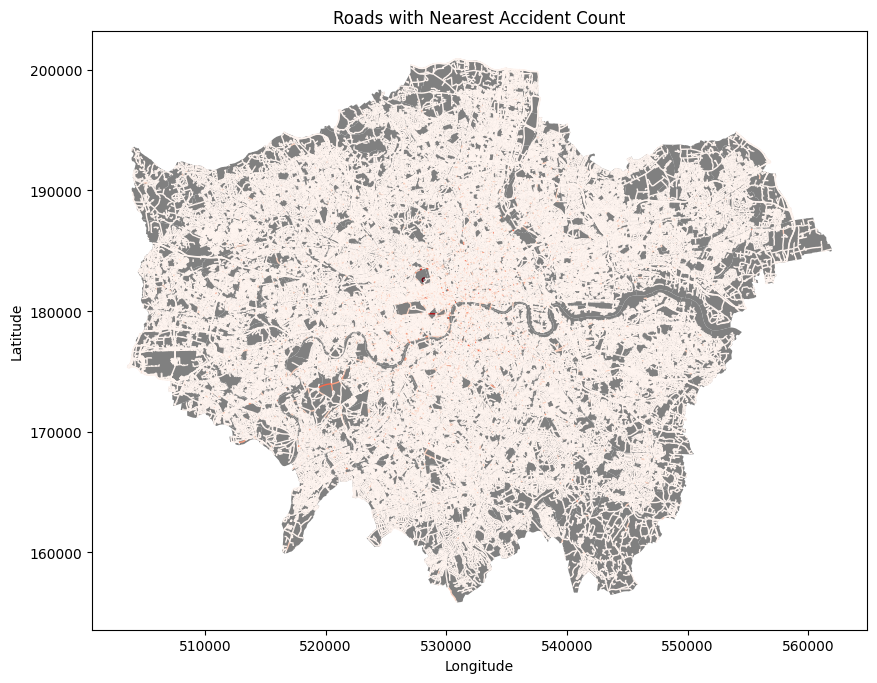

In [75]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(clipped_road, geometry='geometry')
gdf_nonzero = gdf[gdf['nearest_accident_count'] != 0]

fig, ax = plt.subplots(figsize=(10, 10))

london_gdf.plot(ax=ax, color='grey')
gdf.plot(column='nearest_accident_count', cmap='Reds', linewidth=1, ax=ax)

plt.title('Roads with Nearest Accident Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

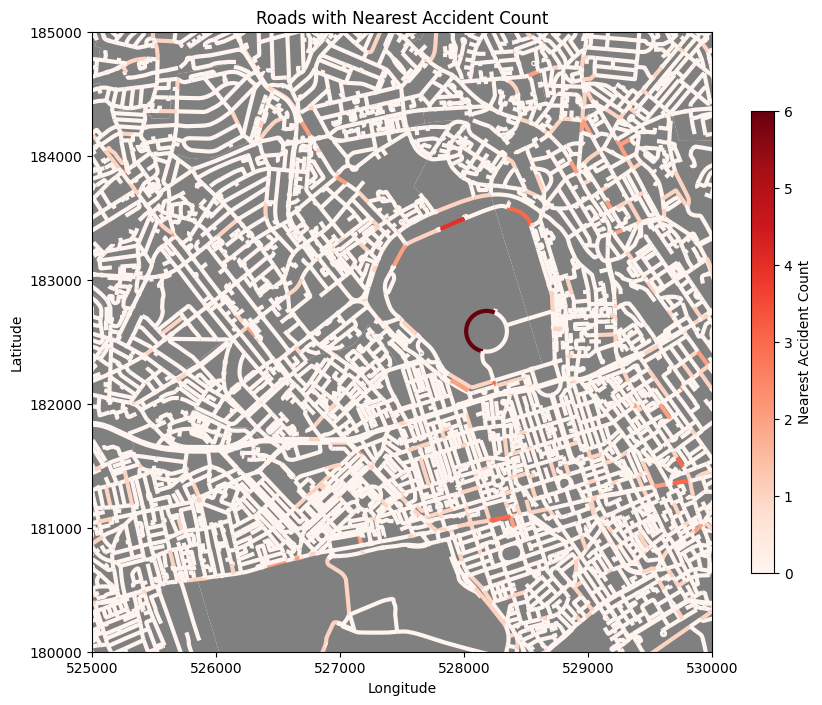

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.GeoDataFrame(clipped_road, geometry='geometry')
# gdf_nonzero = gdf[gdf['nearest_accident_count'] != 0]
fig, ax = plt.subplots(figsize=(10, 10))

london_gdf.plot(ax=ax, color='grey')
gdf.plot(column='nearest_accident_count', cmap='Reds', linewidth=3, ax=ax)

# xmin, xmax = 529755, 531275
# ymin, ymax = 175988, 177091

xmin, xmax = 525000, 530000
ymin, ymax = 180000, 185000

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.title('Roads with Nearest Accident Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

sm = plt.cm.ScalarMappable(cmap='Reds')
sm.set_array(gdf['nearest_accident_count'])
cbar = plt.colorbar(sm, label='Nearest Accident Count', shrink=0.6, ax=ax)

plt.show()

In [17]:
sorted_gdf = gdf.sort_values(by='nearest_accident_count', ascending=False)
print(sorted_gdf['nearest_accident_count'])

256228    6
30751     6
264840    5
251379    5
255652    4
         ..
99636     0
99635     0
99634     0
99633     0
149214    0
Name: nearest_accident_count, Length: 298429, dtype: int64


In [58]:
processed_clipped_road = clipped_road[clipped_road['geometry'].type != 'MultiLineString']

In [72]:
from shapely.geometry import Point
from geopandas import GeoDataFrame
from collections import Counter
import pandas as pd

rows = []
for _, row in processed_clipped_road.iterrows():
    geometry = row['geometry']
    gml_id = row['gml_id']
    
    start_point = geometry.coords[0]
    end_point = geometry.coords[-1]
        
    rows.append({
        # 'geometry': geometry,
        'start_point': start_point,
        'end_point': end_point,
        'gml_id' : gml_id
    })

processed_clipped_road = GeoDataFrame(pd.DataFrame(rows))

# start_point_counts = Counter(exploded_gdf['start_point'])
# end_point_counts = Counter(exploded_gdf['end_point'])

# exploded_gdf['start_connections'] = exploded_gdf['start_point'].apply(lambda point: start_point_counts[point])
# exploded_gdf['end_connections'] = exploded_gdf['end_point'].apply(lambda point: end_point_counts[point])


print(processed_clipped_road)

                           start_point                       end_point  \
0       (519010.882, 164020.326, 36.9)      (519049.0, 164020.0, 37.5)   
1           (518549.0, 164117.0, 35.7)  (518497.676, 164106.711, 35.8)   
2       (517224.939, 161319.456, 52.5)  (517230.868, 161348.498, 52.2)   
3       (518705.546, 164123.024, 35.3)  (518712.744, 164120.211, 35.3)   
4       (516982.292, 163189.385, 52.9)  (516998.589, 163215.584, 52.5)   
...                                ...                             ...   
298389      (532726.0, 181607.0, 14.7)  (532740.049, 181666.122, 15.0)   
298390  (532803.714, 181631.904, 13.9)  (532750.565, 181644.261, 14.7)   
298391  (532710.008, 181679.696, 15.1)      (532715.0, 181698.0, 15.2)   
298392  (532710.008, 181679.696, 15.1)  (532740.049, 181666.122, 15.0)   
298393  (533742.034, 181260.478, 16.0)  (533711.157, 181247.492, 16.1)   

                      gml_id  
0       osgb4000000030205403  
1       osgb4000000030313490  
2       osgb400000

In [73]:
from shapely.geometry import Point
from geopandas import GeoDataFrame
from collections import Counter
import pandas as pd

# rows = []
# exploded_clipped_road = clipped_road.explode()

point_counts = {}
for _, row in processed_clipped_road.iterrows():
    # geometry = row['geometry']
    # start_point = geometry.coords[0]
    # end_point = geometry.coords[-1]

    start_point = row['start_point']
    end_point = row['end_point']
    gml_id = row['gml_id']
    
    if start_point in point_counts:
        point_counts[start_point]['start_count'] += 1
    else:
        point_counts[start_point] = {'start_count': 1, 'end_count': 0}
    
    if end_point in point_counts:
        point_counts[end_point]['end_count'] += 1
    else:
        point_counts[end_point] = {'start_count': 0, 'end_count': 1}


for point, counts in point_counts.items():
    start_count = counts['start_count']
    end_count = counts['end_count']
    total_count = start_count + end_count
    counts['start_count'] = total_count
    counts['end_count'] = total_count

# exploded_gdf = clipped_road.copy()
processed_clipped_road['start_point_count'] = processed_clipped_road['start_point'].apply(lambda point: point_counts[point]['start_count'])
processed_clipped_road['end_point_count'] = processed_clipped_road['end_point'].apply(lambda point: point_counts[point]['end_count'])


print(processed_clipped_road)

                           start_point                       end_point  \
0       (519010.882, 164020.326, 36.9)      (519049.0, 164020.0, 37.5)   
1           (518549.0, 164117.0, 35.7)  (518497.676, 164106.711, 35.8)   
2       (517224.939, 161319.456, 52.5)  (517230.868, 161348.498, 52.2)   
3       (518705.546, 164123.024, 35.3)  (518712.744, 164120.211, 35.3)   
4       (516982.292, 163189.385, 52.9)  (516998.589, 163215.584, 52.5)   
...                                ...                             ...   
298389      (532726.0, 181607.0, 14.7)  (532740.049, 181666.122, 15.0)   
298390  (532803.714, 181631.904, 13.9)  (532750.565, 181644.261, 14.7)   
298391  (532710.008, 181679.696, 15.1)      (532715.0, 181698.0, 15.2)   
298392  (532710.008, 181679.696, 15.1)  (532740.049, 181666.122, 15.0)   
298393  (533742.034, 181260.478, 16.0)  (533711.157, 181247.492, 16.1)   

                      gml_id  start_point_count  end_point_count  
0       osgb4000000030205403                

In [86]:
merged_gdf = pd.merge(clipped_road, processed_clipped_road, on=['gml_id'], how='left')
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry='geometry')


merged_gdf = merged_gdf[merged_gdf['geometry'].type != 'MultiLineString']
print(merged_gdf)

        field_1                gml_id                             identifier  \
0         10920  osgb4000000030205403  http://data.os.uk/id/4000000030205403   
1         12024  osgb4000000030313490  http://data.os.uk/id/4000000030313490   
2         12726  osgb4000000030387915  http://data.os.uk/id/4000000030387915   
3         13641  osgb4000000030472711  http://data.os.uk/id/4000000030472711   
4         13834  osgb4000000030705829  http://data.os.uk/id/4000000030705829   
...         ...                   ...                                    ...   
298424     7024  osgb5000005297100592  http://data.os.uk/id/5000005297100592   
298425    10586  osgb5000005265813954  http://data.os.uk/id/5000005265813954   
298426    41696  osgb4000000030419440  http://data.os.uk/id/4000000030419440   
298427     7023  osgb5000005297100591  http://data.os.uk/id/5000005297100591   
298428    24628  osgb5000005186080564  http://data.os.uk/id/5000005186080564   

                     beginLifes       l

In [87]:
# print(merged_gdf.dtypes)

# merged_highways_gdf = gpd.GeoDataFrame(merged_gdf, geometry='geometry')
# merged_gdf.to_file('merged_highways_gdf.shp', driver='ESRI Shapefile')

merged_gdf.to_csv('merged_highways.csv', index=False)

In [70]:
row = merged_gdf.loc[merged_gdf['gml_id'] == 'osgb5000005200929751']
print(row)

                                              geometry  \
557  LINESTRING Z (518497.676 164106.711 35.800, 51...   

                        start_point                       end_point  \
557  (518497.676, 164106.711, 35.8)  (518468.306, 164100.301, 35.9)   

                   gml_id  start_point_count  end_point_count  
557  osgb5000005200929751                  1                1  


## Highway data process after NKD calculation

In [4]:
highways_2019 = gpd.read_file("./Data/highways_nkd_centroid/highways_nkd_centroid.shp")
highways_2020 = gpd.read_file("./Data/highways_nkd_centroid/highways_nkd_centroid_2020.shp")

In [5]:
print(highways_2020)

        lineID                gml_id   length     slope  strt_p_  end_pn_  \
0            1  osgb4000000030120563   125.00  0.031200      3.0      3.0   
1            2  osgb4000000030120644   184.89  0.117367      3.0      3.0   
2            3  osgb4000000030190788   106.70  0.037488      3.0      3.0   
3            4  osgb4000000030299259    55.90 -0.003578      3.0      3.0   
4            5  osgb4000000030299277    34.77 -0.005752      3.0      3.0   
...        ...                   ...      ...       ...      ...      ...   
311483    4062  osgb5000005180590055    22.24 -0.008993      3.0      3.0   
311484    5505  osgb5000005155998290    27.16  0.000000      3.0      3.0   
311485    9069  osgb5000005157863811    64.24 -0.003113      4.0      3.0   
311486    4573  osgb4000000030081748  1111.21 -0.016918      4.0      3.0   
311487    4096  osgb5000005195065547    18.02  0.000000      4.0      4.0   

         density                       geometry  
0       0.000000  POINT (

In [6]:
print(highways_2019['strt_p_'].max(), highways_2019['end_pn_'].max())

10.0 10.0


In [7]:
highways_2019["strt_p_"] = highways_2019["strt_p_"].astype(int)
highways_2019["end_pn_"] = highways_2019["end_pn_"].astype(int)

for i in range(1, 7):  
    highways_2019["exit_"+str(i)] = 0  

for index, row in highways_2019.iterrows():
    strt_p = min(6, row["strt_p_"])  
    end_pn = min(6, row["end_pn_"])  
    highways_2019.loc[index, "exit_" + str(strt_p)] = 1
    highways_2019.loc[index, "exit_" + str(end_pn)] = 1

print(highways_2019.head(5))



highways_2020["strt_p_"] = highways_2020["strt_p_"].astype(int)
highways_2020["end_pn_"] = highways_2020["end_pn_"].astype(int)

for i in range(1, 7):  
    highways_2020["exit_"+str(i)] = 0  

for index, row in highways_2020.iterrows():
    strt_p = min(6, row["strt_p_"])  
    end_pn = min(6, row["end_pn_"])  
    highways_2020.loc[index, "exit_" + str(strt_p)] = 1
    highways_2020.loc[index, "exit_" + str(end_pn)] = 1

print(highways_2020.head(5))

   lineID                gml_id  length     slope  strt_p_  end_pn_  nrst_c_  \
0       2  osgb4000000030333911   56.09 -0.017828        3        1        0   
1       3  osgb4000000030334091   52.98  0.022650        3        1        0   
2       4  osgb4000000030593582  158.06  0.038593        3        1        0   
3       5  osgb4000000030705260   94.52  0.012696        3        3        0   
4       6  osgb5000005163152130   78.69  0.002542        3        3        0   

   density                       geometry  exit_1  exit_2  exit_3  exit_4  \
0      0.0  POINT (523553.725 195619.092)       1       0       1       0   
1      0.0  POINT (525687.257 195843.873)       1       0       1       0   
2      0.0  POINT (525260.769 195715.971)       1       0       1       0   
3      0.0  POINT (523722.062 195289.423)       0       0       1       0   
4      0.0  POINT (524591.025 195598.101)       0       0       1       0   

   exit_5  exit_6  
0       0       0  
1       0       

In [8]:
print(highways_2020[highways_2020['end_pn_'] == 10]['gml_id'])

11442    osgb4000000030334819
11445    osgb4000000030334828
11833    osgb4000000030334818
11834    osgb4000000030334827
12167    osgb4000000030334831
12261    osgb4000000030334830
12273    osgb4000000030334829
Name: gml_id, dtype: object


# 

In [9]:
cycle_lane_df = pd.read_csv('./Data/Extract_data/cycle_lane_track_line.csv')

cycle_lane_df['geometry'] = cycle_lane_df['geometry'].apply(wkt.loads)
cycle_lane_gdf = gpd.GeoDataFrame(cycle_lane_df, geometry='geometry')

cycle_lane_gdf.crs = "EPSG:4326"
cycle_lane_gdf = cycle_lane_gdf.to_crs("EPSG:27700")

In [10]:
print(cycle_lane_gdf)

      FEATURE_ID      SVDATE  CLT_CARR  CLT_SEGREG  CLT_STEPP  CLT_PARSEG  \
0      RWG154837  2017-10-14      True       False      False       False   
1      RWG154839  2017-10-14      True       False      False       False   
2      RWG154848  2017-10-14      True       False      False       False   
3      RWG154853  2017-10-15      True       False      False       False   
4      RWG155003  2017-10-17      True       False      False       False   
...          ...         ...       ...         ...        ...         ...   
24971  RWG154170  2017-12-06     False       False      False       False   
24972  RWG107707  2017-11-02      True       False      False       False   
24973  RWG221075  2018-02-09     False       False      False       False   
24974  RWG276415  2018-03-13     False       False      False       False   
24975  RWG150303  2017-10-04     False       False      False       False   

      CLT_SHARED CLT_MANDAT  CLT_ADVIS CLT_PRIORI  ...  CLT_BBYPAS  CLT_PAR

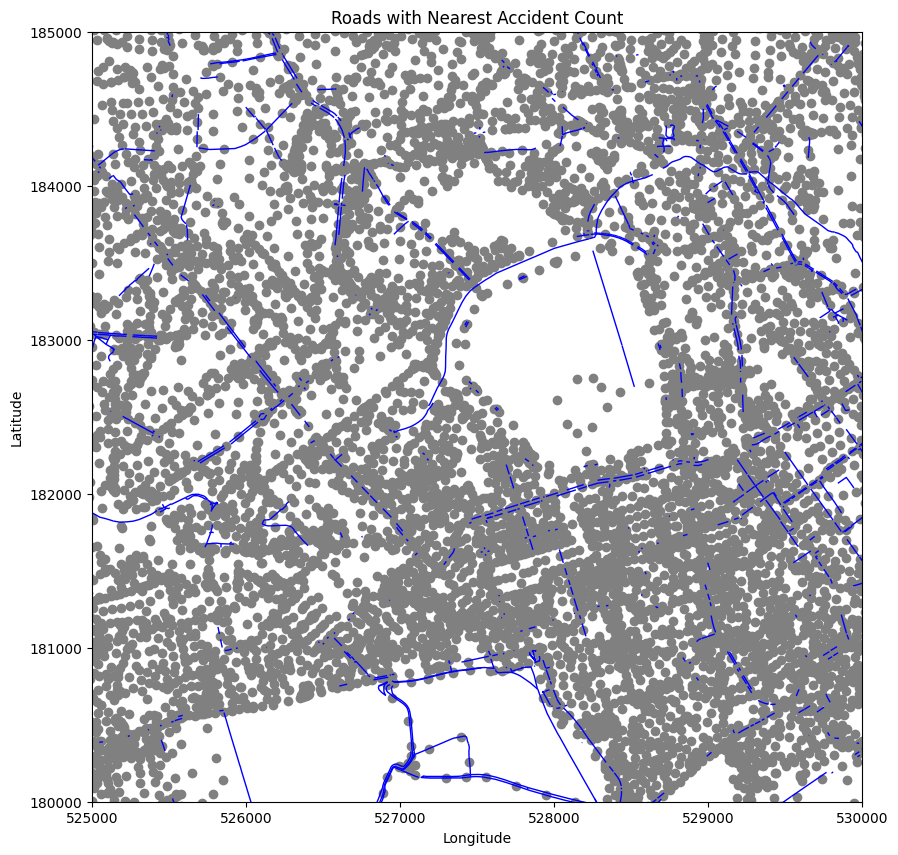

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

# gdf = gpd.GeoDataFrame(clipped_road, geometry='geometry')
# gdf_nonzero = gdf[gdf['nearest_accident_count'] != 0]
fig, ax = plt.subplots(figsize=(10, 10))

highways_2020.plot(ax=ax, color='grey')
cycle_lane_gdf.plot(color='blue', linewidth=1, ax=ax)

# xmin, xmax = 529755, 531275
# ymin, ymax = 175988, 177091

xmin, xmax = 525000, 530000
ymin, ymax = 180000, 185000

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

plt.title('Roads with Nearest Accident Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# sm = plt.cm.ScalarMappable(cmap='Reds')
# sm.set_array(gdf['nearest_accident_count'])
# cbar = plt.colorbar(sm, label='Nearest Accident Count', shrink=0.6, ax=ax)

plt.show()

In [12]:
buffer_size = 10
highways_2019['is_bike_lane'] = 0

for index, row in highways_2019.iterrows():
    point_buffer = row['geometry'].buffer(buffer_size)

    if cycle_lane_gdf.intersects(point_buffer).any():
        highways_2019.loc[index, 'is_bike_lane'] = 1

print(highways_2019.head(5))

   lineID                gml_id  length     slope  strt_p_  end_pn_  nrst_c_  \
0       2  osgb4000000030333911   56.09 -0.017828        3        1        0   
1       3  osgb4000000030334091   52.98  0.022650        3        1        0   
2       4  osgb4000000030593582  158.06  0.038593        3        1        0   
3       5  osgb4000000030705260   94.52  0.012696        3        3        0   
4       6  osgb5000005163152130   78.69  0.002542        3        3        0   

   density                       geometry  exit_1  exit_2  exit_3  exit_4  \
0      0.0  POINT (523553.725 195619.092)       1       0       1       0   
1      0.0  POINT (525687.257 195843.873)       1       0       1       0   
2      0.0  POINT (525260.769 195715.971)       1       0       1       0   
3      0.0  POINT (523722.062 195289.423)       0       0       1       0   
4      0.0  POINT (524591.025 195598.101)       0       0       1       0   

   exit_5  exit_6  is_bike_lane  
0       0       0     

In [13]:
buffer_size = 10
highways_2020['is_bike_lane'] = 0

for index, row in highways_2020.iterrows():
    point_buffer = row['geometry'].buffer(buffer_size)

    if cycle_lane_gdf.intersects(point_buffer).any():
        highways_2020.loc[index, 'is_bike_lane'] = 1

print(highways_2020.head(5))

   lineID                gml_id  length     slope  strt_p_  end_pn_  density  \
0       1  osgb4000000030120563  125.00  0.031200        3        3      0.0   
1       2  osgb4000000030120644  184.89  0.117367        3        3      0.0   
2       3  osgb4000000030190788  106.70  0.037488        3        3      0.0   
3       4  osgb4000000030299259   55.90 -0.003578        3        3      0.0   
4       5  osgb4000000030299277   34.77 -0.005752        3        3      0.0   

                        geometry  exit_1  exit_2  exit_3  exit_4  exit_5  \
0  POINT (529391.127 159383.243)       0       0       1       0       0   
1  POINT (531982.606 159724.296)       0       0       1       0       0   
2  POINT (532191.152 159046.666)       0       0       1       0       0   
3  POINT (532121.139 158843.626)       0       0       1       0       0   
4  POINT (532566.765 159379.366)       0       0       1       0       0   

   exit_6  is_bike_lane  
0       0             0  
1       0 

In [14]:
highways_2019['slope'] = highways_2019['slope'].abs()
highways_2020['slope'] = highways_2020['slope'].abs()

## POI

In [36]:
POI = gpd.read_file("./Data/POI/POI.shp")

In [94]:
# r = 100
# highways_2019['poi_counts'] = 0
# for i, row in highways_2019.iterrows():
#     buffer = row['geometry'].buffer(r)
#     count = POI.within(buffer).sum()
#     highways_2019.loc[i, 'poi_counts'] = count


import geopandas as gpd
from geopandas.tools import sjoin

r = 100  
highways_2019['buffer'] = highways_2019.buffer(r)

gdf_highways_buffer = gpd.GeoDataFrame(highways_2019[['buffer']].copy(), geometry='buffer')

gdf_sjoin = sjoin(POI, gdf_highways_buffer, how='left', op='within')

gdf_poi_counts = gdf_sjoin.groupby('index_right').size()

highways_2019['poi_counts'] = gdf_poi_counts


/opt/anaconda3/envs/UCL/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [95]:

r = 100  
highways_2020['buffer'] = highways_2020.buffer(r)

gdf_highways_buffer = gpd.GeoDataFrame(highways_2020[['buffer']].copy(), geometry='buffer')

gdf_sjoin = sjoin(POI, gdf_highways_buffer, how='left', op='within')

gdf_poi_counts = gdf_sjoin.groupby('index_right').size()

highways_2020['poi_counts'] = gdf_poi_counts

/opt/anaconda3/envs/UCL/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [96]:
highways_2019['poi_counts'] = highways_2019['poi_counts'].fillna(0)
highways_2020['poi_counts'] = highways_2020['poi_counts'].fillna(0)

## Green Space

In [47]:
Green = gpd.read_file("./Data/Green/Green.shp")

In [97]:
highways_2019

,lineID,gml_id,length,slope,strt_p_,end_pn_,nrst_c_,density,geometry,exit_1,...,exit_3,exit_4,exit_5,exit_6,is_bike_lane,poi_counts,green_area_ratio,fictitious,formOfWay,buffer
0,2,osgb4000000030333911,56.09,0.017828,3,1,0,0.000000,POINT (523553.725 195619.092),1,...,1,0,0,0,0,11.0,0.00000,0,1,"POLYGON ((523653.725 195619.092, 523653.243 19..."
1,2,osgb4000000030333911,56.09,0.017828,3,1,0,0.000000,POINT (523553.725 195619.092),1,...,1,0,0,0,0,11.0,0.00000,0,1,"POLYGON ((523653.725 195619.092, 523653.243 19..."
2,3,osgb4000000030334091,52.98,0.022650,3,1,0,0.000000,POINT (525687.257 195843.873),1,...,1,0,0,0,0,8.0,0.00000,0,1,"POLYGON ((525787.257 195843.873, 525786.775 19..."
3,3,osgb4000000030334091,52.98,0.022650,3,1,0,0.000000,POINT (525687.257 195843.873),1,...,1,0,0,0,0,8.0,0.00000,0,1,"POLYGON ((525787.257 195843.873, 525786.775 19..."
4,4,osgb4000000030593582,158.06,0.038593,3,1,0,0.000000,POINT (525260.769 195715.971),1,...,1,0,0,0,0,9.0,0.00000,0,1,"POLYGON ((525360.769 195715.971, 525360.287 19..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324970,8809,osgb5000005126957517,6.06,0.016502,5,2,2,0.068002,POINT (533785.794 176782.528),0,...,0,0,1,0,1,9.0,0.00619,0,1,"POLYGON ((533885.794 176782.528, 533885.312 17..."
324971,7510,osgb5000005174969470,33.41,0.000000,3,3,0,0.071332,POINT (530387.114 180278.760),0,...,1,0,0,0,0,27.0,0.00000,0,3,"POLYGON ((530487.114 180278.760, 530486.632 18..."
324972,8412,osgb4000000030860652,21.98,0.000000,3,3,1,0.086809,POINT (530388.972 180289.823),0,...,1,0,0,0,0,25.0,0.00000,0,2,"POLYGON ((530488.972 180289.823, 530488.491 18..."
324973,7969,osgb4000000030860653,24.94,0.000000,3,3,4,0.094496,POINT (530395.791 180274.724),0,...,1,0,0,0,0,23.0,0.00000,0,1,"POLYGON ((530495.791 180274.724, 530495.309 18..."


In [66]:
import geopandas as gpd

r = 200  

highways_2019['buffer'] = highways_2019['geometry'].buffer(r)
highways_2019.set_geometry('buffer', inplace=True)

green_within_buffer = gpd.sjoin(Green, highways_2019, op='within')
# print(green_within_buffer.columns)

green_within_buffer = gpd.GeoDataFrame(green_within_buffer, geometry='geometry_left')
green_within_buffer['area'] = green_within_buffer.geometry.area

green_area_per_buffer = green_within_buffer.groupby('index_right')['area'].sum()
green_area_per_buffer = green_area_per_buffer.reindex(highways_2019.index, fill_value=0)


buffer_area = highways_2019['buffer'].area

highways_2019['green_area_ratio'] = green_area_per_buffer / buffer_area

highways_2019.set_geometry('geometry', inplace=True)


/opt/anaconda3/envs/UCL/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [68]:
import geopandas as gpd

r = 200 

highways_2020['buffer'] = highways_2020['geometry'].buffer(r)
highways_2020.set_geometry('buffer', inplace=True)

green_within_buffer = gpd.sjoin(Green, highways_2020, op='within')

green_within_buffer = gpd.GeoDataFrame(green_within_buffer, geometry='geometry_left')
green_within_buffer['area'] = green_within_buffer.geometry.area

green_area_per_buffer = green_within_buffer.groupby('index_right')['area'].sum()
green_area_per_buffer = green_area_per_buffer.reindex(highways_2020.index, fill_value=0)

buffer_area = highways_2020['buffer'].area

highways_2020['green_area_ratio'] = green_area_per_buffer / buffer_area

highways_2020.set_geometry('geometry', inplace=True)

/opt/anaconda3/envs/UCL/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3382: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


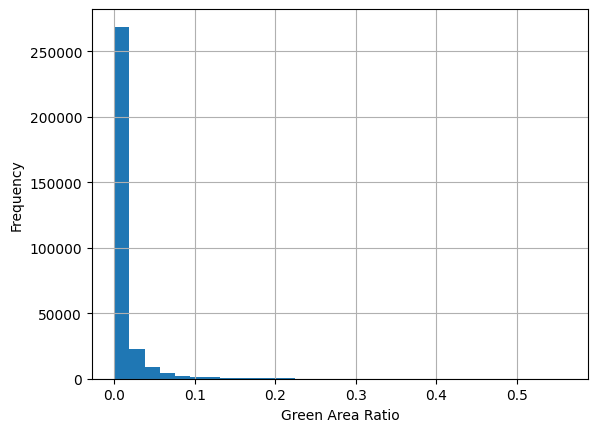

In [71]:
import matplotlib.pyplot as plt

highways_2020['green_area_ratio'].hist(bins=30)
plt.xlabel('Green Area Ratio')
plt.ylabel('Frequency')
plt.show()

## Export data

In [99]:
highways_2019 = highways_2019.drop(columns='buffer')
highways_2020 = highways_2020.drop(columns='buffer')

In [77]:
highways_2019 = highways_2019.merge(additional_columns, on='gml_id')
highways_2020 = highways_2020.merge(additional_columns, on='gml_id')
highways_2020

,lineID,gml_id,length,slope,strt_p_,end_pn_,density,geometry,exit_1,exit_2,exit_3,exit_4,exit_5,exit_6,is_bike_lane,poi_counts,green_area_ratio,fictitious,formOfWay
0,1,osgb4000000030120563,125.00,0.031200,3,3,0.000000,POINT (529391.127 159383.243),0,0,1,0,0,0,0,7.0,0.026892,False,Single Carriageway
1,2,osgb4000000030120644,184.89,0.117367,3,3,0.000000,POINT (531982.606 159724.296),0,0,1,0,0,0,0,5.0,0.000000,False,Single Carriageway
2,3,osgb4000000030190788,106.70,0.037488,3,3,0.000000,POINT (532191.152 159046.666),0,0,1,0,0,0,0,1.0,0.000000,False,Single Carriageway
3,4,osgb4000000030299259,55.90,0.003578,3,3,0.000000,POINT (532121.139 158843.626),0,0,1,0,0,0,0,2.0,0.000000,False,Single Carriageway
4,5,osgb4000000030299277,34.77,0.005752,3,3,0.000000,POINT (532566.765 159379.366),0,0,1,0,0,0,0,1.0,0.000000,False,Single Carriageway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311483,4038,osgb5000005180590051,31.03,0.006445,3,3,0.065210,POINT (537286.746 182832.819),0,0,1,0,0,0,1,27.0,0.000000,False,Single Carriageway
311484,4062,osgb5000005180590055,22.24,0.008993,3,3,0.066072,POINT (537311.043 182842.961),0,0,1,0,0,0,1,28.0,0.000000,False,Traffic Island Link
311485,5505,osgb5000005155998290,27.16,0.000000,3,3,0.067712,POINT (527730.013 171951.752),0,0,1,0,0,0,1,64.0,0.005883,False,Single Carriageway
311486,9069,osgb5000005157863811,64.24,0.003113,4,3,0.068617,POINT (529853.611 181385.338),0,0,1,1,0,0,0,104.0,0.021471,False,Single Carriageway


In [82]:
highways_2019['formOfWay'].value_counts()

# Single Carriageway = 1
# Dual Carriageway  = 2
# Traffic Island Link At Junction = 3
# Traffic Island Link = 4
# Roundabout = 5
# Track = 6
# Enclosed Traffic Area  = 7
# Slip Road = 8
# Shared Use Carriageway = 9
# Layby = 10

mapping = {
    'Single Carriageway': 1,
    'Dual Carriageway': 2,
    'Traffic Island Link At Junction': 3,
    'Traffic Island Link': 4,
    'Roundabout': 5,
    'Track': 6,
    'Enclosed Traffic Area': 7,
    'Slip Road': 8,
    'Shared Use Carriageway': 9,
    'Layby': 10
}

highways_2019['formOfWay'] = highways_2019['formOfWay'].replace(mapping)

In [81]:
highways_2020['formOfWay'].value_counts()

mapping = {
    'Single Carriageway': 1,
    'Dual Carriageway': 2,
    'Traffic Island Link At Junction': 3,
    'Traffic Island Link': 4,
    'Roundabout': 5,
    'Track': 6,
    'Enclosed Traffic Area': 7,
    'Slip Road': 8,
    'Shared Use Carriageway': 9,
    'Layby': 10
}

highways_2020['formOfWay'] = highways_2020['formOfWay'].replace(mapping)

In [86]:
mapping = {"False": 0, "True": 1}

highways_2019['fictitious'] = highways_2019['fictitious'].replace(mapping)
highways_2020['fictitious'] = highways_2020['fictitious'].replace(mapping)

In [102]:
highways_2019.columns

Index(['lineID', 'gml_id', 'length', 'slope', 'strt_p_', 'end_pn_', 'nrst_c_',
       'density', 'geometry', 'exit_1', 'exit_2', 'exit_3', 'exit_4', 'exit_5',
       'exit_6', 'is_bike_lane', 'poi_counts', 'green_area_ratio',
       'fictitious', 'formOfWay'],
      dtype='object')

In [101]:
highways_2019.to_file("Data/final_highways/final_highways_2019.shp")
highways_2020.to_file("Data/final_highways/final_highways_2020.shp")

/var/folders/vk/ndnyb_bs4jg8wmvg8pxsw4940000gn/T/ipykernel_4706/3227158637.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  highways_2019.to_file("Data/final_highways/final_highways_2019.shp")
/var/folders/vk/ndnyb_bs4jg8wmvg8pxsw4940000gn/T/ipykernel_4706/3227158637.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  highways_2020.to_file("Data/final_highways/final_highways_2020.shp")


In [ ]:
print(highways_2020['is_bike_lane'].value_counts())

0    283765
1     27723
Name: is_bike_lane, dtype: int64
